In [1]:
import argparse
from tensorflow import keras
from tensorflow.python.keras.models import model_from_json
import numpy as np 
import shap 

from tools.metadata_tools import *
shap.initjs()

In [2]:
from monumai.monument import Monument
names = [el for sublist in list(Monument.ELEMENT_DIC.values()) for el in sublist]

In [3]:
modelfile = "models/trainingJSON_2020-06-16_12:32:03"
test = "../Results/json_detection/"
train = "../Results/json_detection/train"

In [4]:
json = open(modelfile+'.json', 'r')
model_json = json.read()
json.close()
loaded_model = model_from_json(model_json)
# load weights into loaded model
loaded_model.load_weights(modelfile+'.h5')
print('Model loaded')
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model loaded


In [5]:
matrix_metadata = metadata_to_matrix(train, "json")
train_data = matrix_metadata[:,:14].astype(np.float32)
from keras.utils import to_categorical
train_label = to_categorical(matrix_metadata[:,14].astype(np.float32).astype(np.int8))

Using TensorFlow backend.


In [6]:
matrix_metadata = metadata_to_matrix(test, "json")
test_data = matrix_metadata[:,:14].astype(np.float32)
test_label = to_categorical(matrix_metadata[:,14].astype(np.float32).astype(np.int8))

In [7]:
def f(X):
    return loaded_model.predict(X)
elements = np.random.choice(len(train_data), int(0.3*len(train_data)), False)

In [ ]:
explainer = shap.KernelExplainer(f, train_data[elements])
shap_values = explainer.shap_values(test_data, nsamples=100)

In [9]:
shap.force_plot(explainer.expected_value[0], shap_values[0], test_data, feature_names=names)

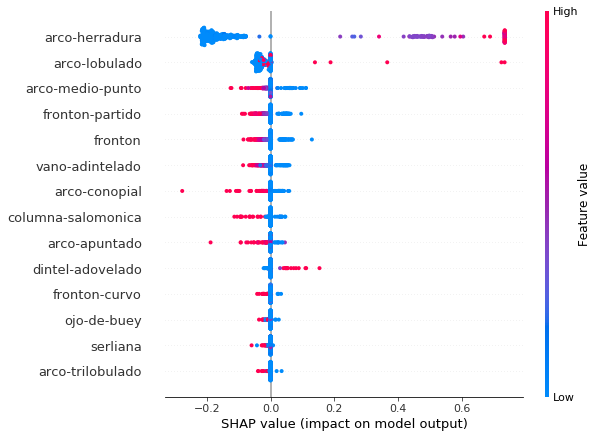

In [18]:
shap.summary_plot(shap_values[0], test_data, feature_names=names)

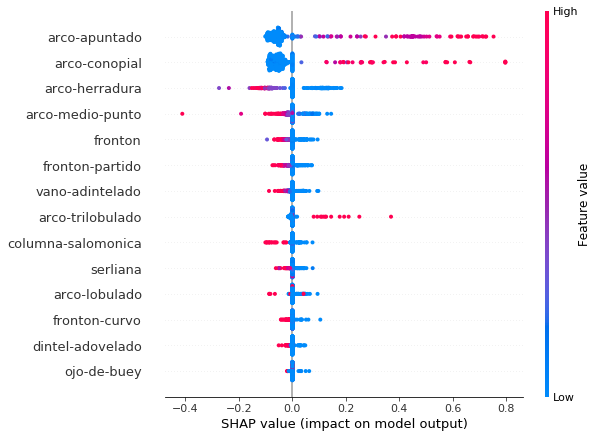

In [19]:
shap.summary_plot(shap_values[1], test_data, feature_names=names)

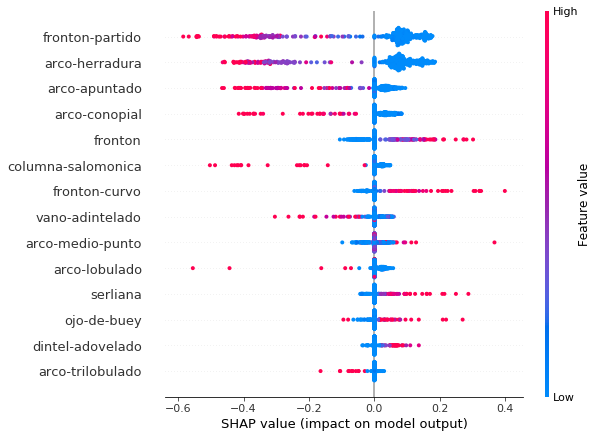

In [20]:
shap.summary_plot(shap_values[2], test_data, feature_names=names)

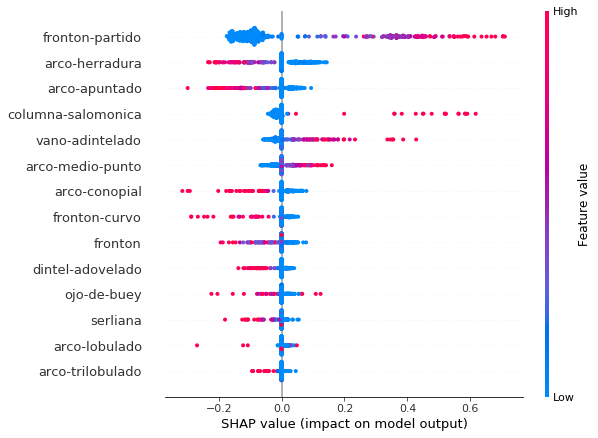

In [21]:
shap.summary_plot(shap_values[3], test_data, feature_names=names)

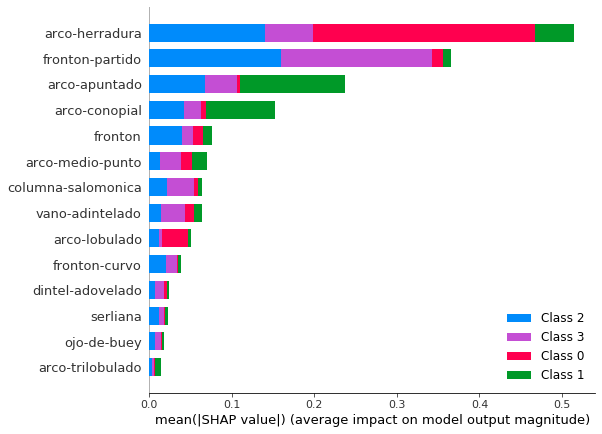

In [22]:
shap.summary_plot(shap_values, test_data, feature_names=names)

In [15]:
[el for sublist in list(Monument.ELEMENT_DIC.values()) for el in sublist]

['arco-herradura',
 'arco-lobulado',
 'dintel-adovelado',
 'arco-apuntado',
 'arco-conopial',
 'arco-trilobulado',
 'fronton',
 'fronton-curvo',
 'serliana',
 'arco-medio-punto',
 'vano-adintelado',
 'ojo-de-buey',
 'fronton-partido',
 'columna-salomonica']

In [16]:
np.mean(test_data,axis=0)

array([0.44165725, 0.06469974, 0.11941397, 0.3589965 , 0.17152545,
       0.0627219 , 0.5486303 , 0.21796255, 0.11605043, 0.78714323,
       0.8640274 , 0.2958105 , 0.43944755, 0.18899803], dtype=float32)